In [208]:
from platform import python_version

print(python_version())

3.10.9


dataset from [here](https://www.kaggle.com/navoneel/brain-mri-images-for-brain-tumor-detection) and stored the data locally. Data is also available on github as the storage size on git allows for it. 

Using this dataset as practice as the images are of different dimensions, similar to another project im working on for a business. 

In [209]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 # good for separating RGB properties of an image. 
import glob

In [210]:
pip list

Package                       Version
----------------------------- ---------------
absl-py                       1.4.0
alabaster                     0.7.12
anaconda-client               1.11.2
anaconda-navigator            2.4.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.11.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4                4.11.1
binary

In [211]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 77B6-1F68

 Directory of C:\Users\Rudol\0_Github\Brain MRI Data\Brain-MRI-Image-Classifier

29/08/2023  03:06 PM    <DIR>          .
29/08/2023  03:06 PM    <DIR>          ..
24/08/2023  04:37 PM    <DIR>          .ipynb_checkpoints
29/08/2023  03:06 PM         2,126,134 Brain_MRI.ipynb
20/07/2023  09:04 PM    <DIR>          dataset
27/08/2023  11:12 PM    <DIR>          logs
               1 File(s)      2,126,134 bytes
               5 Dir(s)  929,852,764,160 bytes free


# Reading a single image

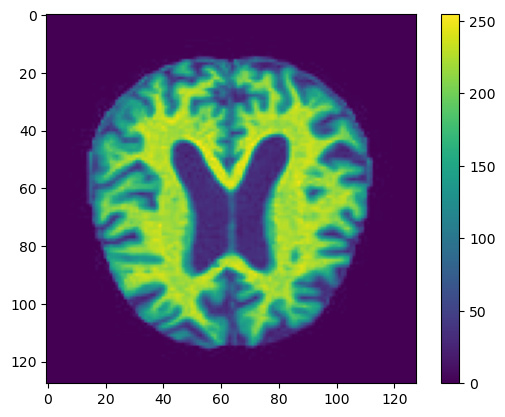

In [212]:
from PIL import Image

image = Image.open('./dataset/Mild_Demented/mild.jpg')
plt.imshow(image)
plt.colorbar()

# Reading multiple images

In [213]:
data_path = './dataset/'
demented_type = ['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented'] #should leard how to extract this with code


for folder in demented_type:
    file_name = glob.glob(data_path + folder + '*.jpg')
    

In [214]:
data_path = './dataset/'

mild = [] 
very_mild = []
healthy = [] 
moderate = []

for i in glob.glob(data_path + 'Mild_Demented' + '/*.jpg'):
    image = cv2.imread(i)
    image= cv2.resize(image, (128,128)) 
    b, g, r = cv2.split(image)
    image = cv2.merge([r, g, b])
    mild.append(image)


for i in glob.glob(data_path + 'Very_Mild_Demented' + '/*.jpg'):
    image = cv2.imread(i)
    image= cv2.resize(image, (128,128))
    b, g, r = cv2.split(image)
    image = cv2.merge([r, g, b])
    very_mild.append(image)

for i in glob.glob(data_path + 'Non_Demented' + '/*.jpg'):
    image = cv2.imread(i)
    image= cv2.resize(image, (128,128))
    b, g, r = cv2.split(image)
    image = cv2.merge([r, g, b])
    healthy.append(image)

for i in glob.glob(data_path + 'Moderate_Demented' + '/*.jpg'):
    image = cv2.imread(i)
    image= cv2.resize(image, (128,128))
    b, g, r = cv2.split(image)
    image = cv2.merge([r, g, b])
    moderate.append(image)


In [215]:
len(very_mild)

2240

In [216]:
mild = np.array(mild)
mild.shape # cannot do this with lists. 

(896, 128, 128, 3)

In [217]:
very_mild = np.array(very_mild)

moderate = np.array(moderate)

healthy = np.array(healthy)

In [218]:
all_types = np.concatenate((mild, very_mild, moderate, healthy))

In [219]:
all_types.shape # all images combined into one dimension. the first dimension is the sum of all the demented types

(6400, 128, 128, 3)

# Visualisation

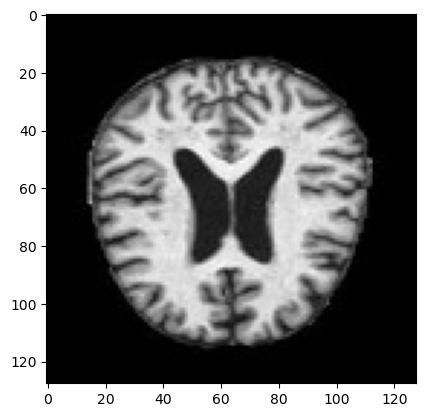

In [220]:
plt.imshow(very_mild[0])

In [221]:
def plot_random(mild, very_mild, moderate, healthy, num= 3):
    mild_images = mild[np.random.choice(mild.shape[0], num, replace = False)]
    very_mild_images = very_mild[np.random.choice(very_mild.shape[0], num, replace = False)]
    moderate_images = moderate[np.random.choice(moderate.shape[0], num, replace = False)]
    healthy_images = healthy[np.random.choice(healthy.shape[0], num, replace = False)]
    
    plt.figure(figsize = (16, 9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title('healthy')
        plt.imshow(healthy_images[i])
    
    plt.figure(figsize = (16,9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title('very_mild')
        plt.imshow(very_mild[i])
        
    plt.figure(figsize = (16,9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title('mild')
        plt.imshow(mild_images[i])
        
    plt.figure(figsize= (16,9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title('moderate')
        plt.imshow(moderate_images[i])

Above is not very efficient, can reduce the number of 'for loops', however this is just for demonstration purposes. 

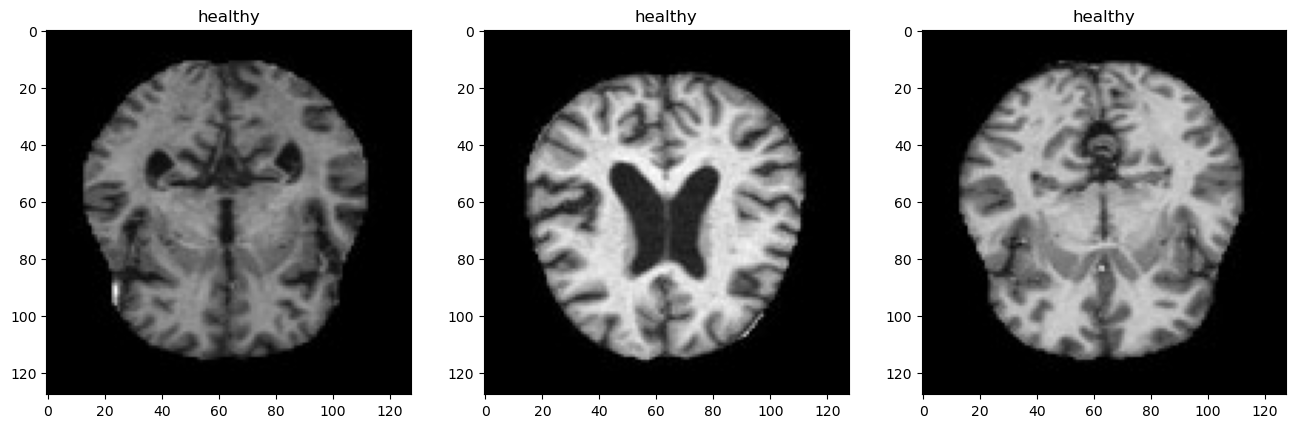

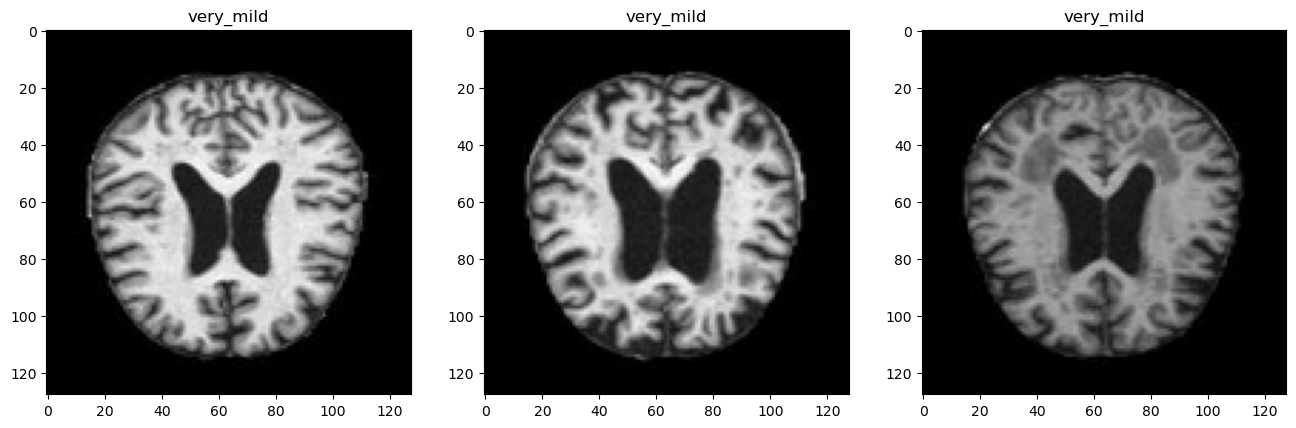

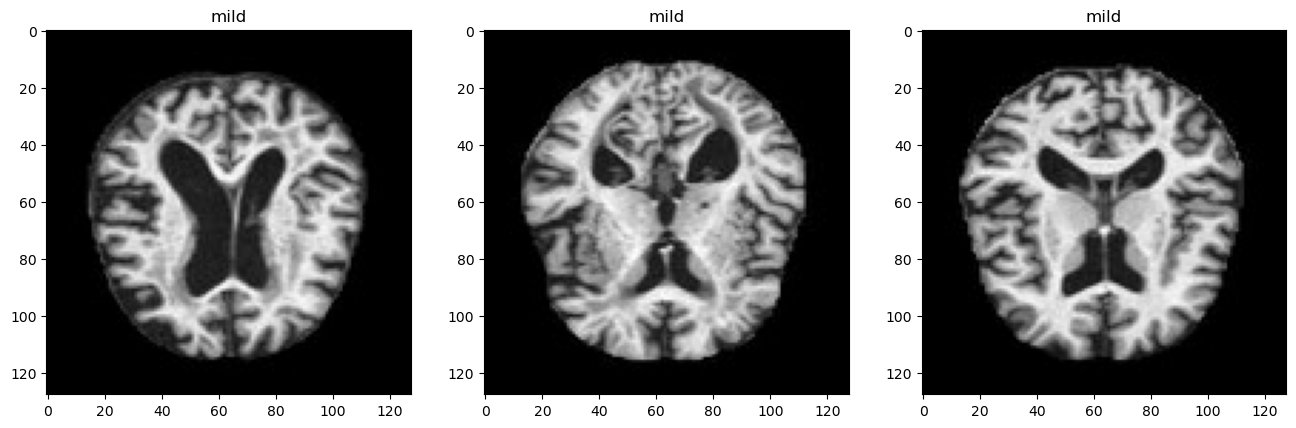

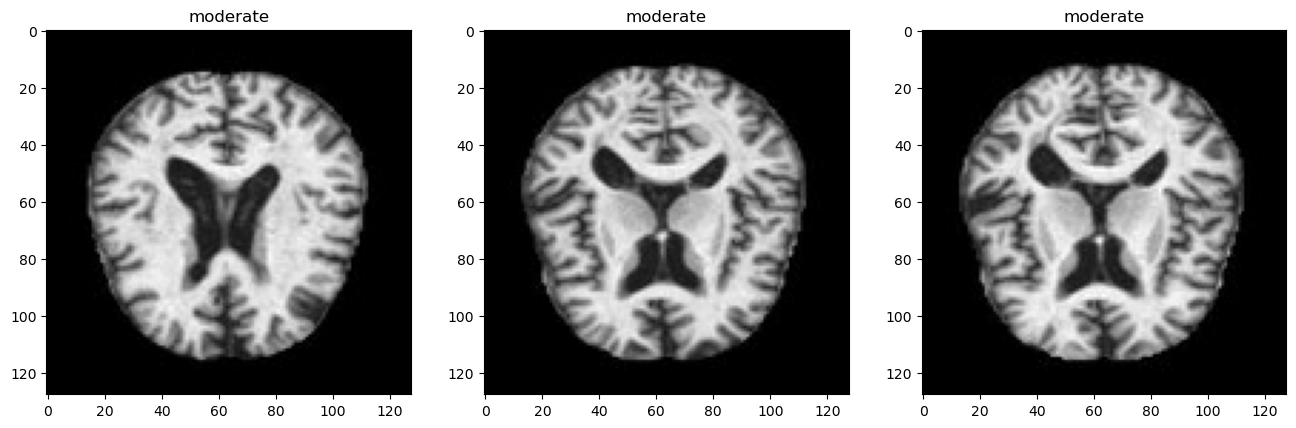

In [222]:
plot_random(mild, very_mild, moderate, healthy)

# Data preparation

## Normalisation

Normalisation is crucial for deep learning. We want to modify the data so that the mean is zero and the standard deviation is one. Therefore ranging between -1 and 1. We do this for including the data in the same range as the activation function for the model. This will allow for less frequent non-zero gradients during training, allowing the neurons in the network to learn faster. Normalising also ensures the channel information can be mixed and updated during the gradient descent (back propagation_ using the same learning rate. 

### Pytorch normalisation

In [223]:
import torch

The images need to be tensors

In [224]:
from torchvision import transforms

Converting from an image to a tensor

In [225]:
mild.shape

(896, 128, 128, 3)

In [226]:
convert_tensor = transforms.ToTensor()
single_mild = convert_tensor(mild[0])

In [227]:
single_mild

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])

Checking we can still display the image

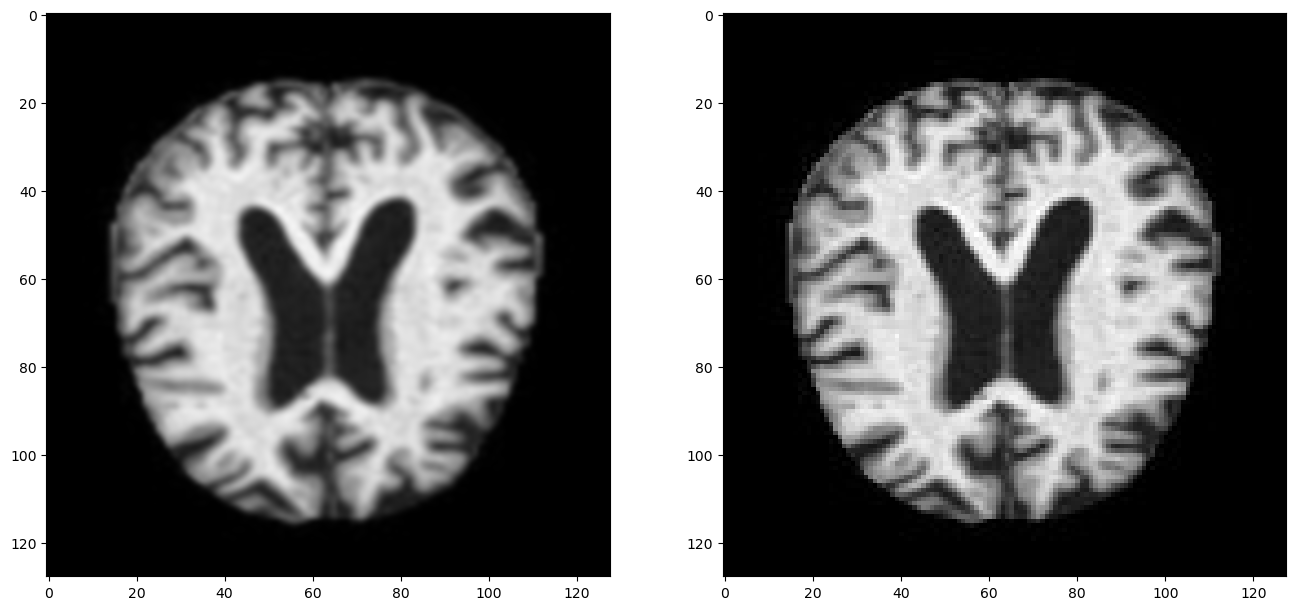

In [228]:
plt.figure(figsize = (16,9))
plt.subplot(121)
plt.imshow(transforms.ToPILImage()(single_mild), interpolation="bicubic")

plt.subplot(122)
plt.imshow(mild[0])

Notice the image that was transformed twice is a little blurry. 

the stack function requires a tuple of tensors, so we can't feed it a single image.

In [229]:
convert_tensor = transforms.ToTensor()

# Using a lambda function

mild_tensors = [convert_tensor(image) for image in mild]
very_mild_tensors = [convert_tensor(image) for image in very_mild]
moderate_tensors = [convert_tensor(image) for image in moderate]
healthy_tensors = [convert_tensor(image) for image in healthy]

As this provides a list of tensors, we can make it a single tensor, which allows for a more efficient model. The model will be able to distinguish between the separate images even if it's a single tensor. 

In [230]:
mild_tensor = torch.stack(mild_tensors)
very_mild_tensor = torch.stack(very_mild_tensors)
moderate_tensor = torch.stack(moderate_tensors)
healthy_tensor = torch.stack(healthy_tensors)

In [231]:
mild_tensor.shape

torch.Size([896, 3, 128, 128])

Getting the mean for each channel (RGB)

In [232]:
mild_tensor.view(3, -1).mean(dim=1)

tensor([0.2635, 0.2634, 0.2578])

In [233]:
mild_tensor.view(3, -1).std(dim = 1)

tensor([0.3152, 0.3111, 0.3162])

We can now use Pytorch's normalisation function from the transform module

In [234]:
norm =  transforms.Normalize(mild_tensor.view(3, -1).mean(dim=1), mild_tensor.view(3, -1).std(dim = 1))
mild_norm = norm(mild_tensor)

norm =  transforms.Normalize(very_mild_tensor.view(3, -1).mean(dim=1), very_mild_tensor.view(3, -1).std(dim = 1))
very_mild_norm = norm(very_mild_tensor)

norm =  transforms.Normalize(moderate_tensor.view(3, -1).mean(dim=1), moderate_tensor.view(3, -1).std(dim = 1))
moderate_norm = norm(moderate_tensor)

norm =  transforms.Normalize(healthy_tensor.view(3, -1).mean(dim=1), healthy_tensor.view(3, -1).std(dim = 1))
healthy_norm = norm(healthy_tensor)

In [235]:
print(mild_norm.mean(), mild_norm.std())

tensor(-3.9122e-05) tensor(1.0002)


We want 0 and 1 however there may have been rounding errors in the data distribution. We don't want to further round the mean and std as this may introduce precision errors in the future.

## Flattening

Flattening is useful for fully connected networks with dense layers. These networks usually expect 1D input while we currently have 3D. 

Convolutional neural networks can work with 3D tensors directly. CNN is designed to process spatial information in the data. 

Depending on the network used, it will advise whether to flatten. Also important to know the difference between reshaping and flattening. 

Good to experiment with different models to gauge performance with flattenned vs unflattened.

In [236]:
mild_flat = [] 

for i, val in enumerate(mild_norm):
    mild_flat.append(mild_norm[i].flatten())
    
very_mild_flat = [] 

for i, val in enumerate(very_mild_norm):
    very_mild_flat.append(very_mild_norm[i].flatten())
    
moderate_flat = [] 

for i, val in enumerate(moderate_norm):
    moderate_flat.append(moderate_norm[i].flatten())
    
healthy_flat = [] 

for i, val in enumerate(healthy_norm):
    healthy_flat.append(healthy_norm[i].flatten())

In [237]:
type(mild_flat)

list

In [238]:
all_flat = []

all_flat = mild_flat + very_mild_flat + moderate_flat + healthy_flat
all_flat = torch.stack(all_flat)

print(all_flat.shape)

torch.Size([6400, 49152])


## 1D vector of labels

In [239]:
def globFn(demented_type: str):
    #stores the file names in a list
    fitsFileNames = glob.glob(data_path + demented_type +'/*.jpg') # Where the asterisk symbol acts as a wildcard
    return fitsFileNames

In [240]:
#creating the labels
mild_filenames = globFn('Mild_Demented')
very_mild_filenames = globFn('Very_Mild_Demented')
moderate_filenames = globFn('Moderate_Demented')
healthy_filenames = globFn('Non_Demented')

#we want to now binarize these labels so that we can use them in our `trainTestSplitFn`
mild_filenames[0:10]

['./dataset/Mild_Demented\\mild.jpg',
 './dataset/Mild_Demented\\mild_10.jpg',
 './dataset/Mild_Demented\\mild_100.jpg',
 './dataset/Mild_Demented\\mild_101.jpg',
 './dataset/Mild_Demented\\mild_102.jpg',
 './dataset/Mild_Demented\\mild_103.jpg',
 './dataset/Mild_Demented\\mild_104.jpg',
 './dataset/Mild_Demented\\mild_105.jpg',
 './dataset/Mild_Demented\\mild_106.jpg',
 './dataset/Mild_Demented\\mild_107.jpg']

In [241]:
len(mild_filenames)

896

In [345]:
demented_type

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [344]:
demented_type_dict = {demented_type[0]: 'mild', demented_type[1]: 'moderate', 
                      demented_type[2]: 'healthy', demented_type[3]: 'very_mild'}

TypeError: unhashable type: 'numpy.ndarray'

In [244]:
all_filenames = np.concatenate((mild_filenames, very_mild_filenames, 
                                moderate_filenames, healthy_filenames))
all_filenames.shape

(6400,)

In [245]:
all_filenames

array(['./dataset/Mild_Demented\\mild.jpg',
       './dataset/Mild_Demented\\mild_10.jpg',
       './dataset/Mild_Demented\\mild_100.jpg', ...,
       './dataset/Non_Demented\\non_997.jpg',
       './dataset/Non_Demented\\non_998.jpg',
       './dataset/Non_Demented\\non_999.jpg'], dtype='<U46')

In [246]:
for i in demented_type_dict:
    print(i)

Mild_Demented
Moderate_Demented
Non_Demented
Very_Mild_Demented


In [247]:
mild_filenames
very_mild_filenames
moderate_filenames
healthy_filenames

['./dataset/Non_Demented\\non.jpg',
 './dataset/Non_Demented\\non_10.jpg',
 './dataset/Non_Demented\\non_100.jpg',
 './dataset/Non_Demented\\non_1000.jpg',
 './dataset/Non_Demented\\non_1001.jpg',
 './dataset/Non_Demented\\non_1002.jpg',
 './dataset/Non_Demented\\non_1003.jpg',
 './dataset/Non_Demented\\non_1004.jpg',
 './dataset/Non_Demented\\non_1005.jpg',
 './dataset/Non_Demented\\non_1006.jpg',
 './dataset/Non_Demented\\non_1007.jpg',
 './dataset/Non_Demented\\non_1008.jpg',
 './dataset/Non_Demented\\non_1009.jpg',
 './dataset/Non_Demented\\non_101.jpg',
 './dataset/Non_Demented\\non_1010.jpg',
 './dataset/Non_Demented\\non_1011.jpg',
 './dataset/Non_Demented\\non_1012.jpg',
 './dataset/Non_Demented\\non_1013.jpg',
 './dataset/Non_Demented\\non_1014.jpg',
 './dataset/Non_Demented\\non_1015.jpg',
 './dataset/Non_Demented\\non_1016.jpg',
 './dataset/Non_Demented\\non_1017.jpg',
 './dataset/Non_Demented\\non_1018.jpg',
 './dataset/Non_Demented\\non_1019.jpg',
 './dataset/Non_Demented\

In [248]:
labels = []

for filename in mild_filenames:
    labels.append(0)

for filename in very_mild_filenames:
    labels.append(1)

for filename in moderate_filenames:
    labels.append(2)

for filename in healthy_filenames:
    labels.append(3)

labels = np.array(labels)
print(labels.shape)

(6400,)


In [330]:
demented_type_dict = {0: 'mild', 2: 'moderate_mild', 
                      3: 'healthy', 1: 'very_mild'}

Problem with the above is the loop sees 'Mild_demented twice, thus adding more number of labels. 

Checking that there is 4 labels

In [249]:
np.unique(labels)

array([0, 1, 2, 3])

In [250]:
print(mild_norm.shape)

torch.Size([896, 3, 128, 128])


In [251]:
mild.shape

(896, 128, 128, 3)

In [252]:
all_flat

tensor([[-0.8358, -0.8358, -0.8358,  ..., -0.8151, -0.8151, -0.8151],
        [-0.8358, -0.8358, -0.8358,  ..., -0.8151, -0.8151, -0.8151],
        [-0.8358, -0.8358, -0.8358,  ..., -0.8151, -0.8151, -0.8151],
        ...,
        [-0.8855, -0.8855, -0.8855,  ..., -0.8499, -0.8499, -0.8499],
        [-0.8855, -0.8855, -0.8855,  ..., -0.8499, -0.8499, -0.8499],
        [-0.8855, -0.8855, -0.8855,  ..., -0.8499, -0.8499, -0.8499]])

In [253]:
from sklearn.model_selection import train_test_split

#splitting the DF with the split function
train_set, test_set, train_labels, test_labels= train_test_split(all_flat, labels, stratify= labels, test_size= 0.3, random_state= 42)

In [254]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer() #sets the function to a variable, less writing.

#converting our labels which contain 0,1,2 into one-hot vector format which is required for the binarizor function
train_labels = lb.fit_transform(train_labels)
test_labels = lb.transform(test_labels) 

print('train_labels shape: ', train_labels.shape, 'and test_labels shape: ', test_labels.shape)

train_labels shape:  (4480, 4) and test_labels shape:  (1920, 4)


In [255]:
test_labels[0:10]

array([[0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 0, 1]])

# Artificial Neural Networks

Converting the Pytorch tensors to Tensorflow tensors

## first model attempt

In [256]:
import tensorflow as tf
import numpy as np

# Assuming you have numpy arrays: train_set, train_labels, test_set, test_labels

# Convert NumPy arrays to TensorFlow tensors
train_set_tf = tf.convert_to_tensor(train_set, dtype=tf.float32)
train_labels_tf = tf.convert_to_tensor(train_labels, dtype=tf.float32)
test_set_tf = tf.convert_to_tensor(test_set, dtype=tf.float32)
test_labels_tf = tf.convert_to_tensor(test_labels, dtype=tf.float32)

In [257]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [258]:
import tensorflow as tf
print("GPU available:", tf.config.list_physical_devices())

GPU available: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [259]:
from tensorflow.keras.callbacks import TensorBoard

tensorboard_callback = TensorBoard(log_dir="./logs", histogram_freq=1)

In [260]:
from sklearn.metrics import classification_report
print(tf.__version__)

2.13.0


In [261]:
from sklearn.metrics import classification_report

# Convert EagerTensor to a NumPy array
test_labels_np = test_labels_tf.numpy()

# Print a formatted report
print(classification_report(
    test_labels_np.argmax(axis=1), 
    predictionsANN.argmax(axis=1), 
    target_names=[str(x) for x in lb.classes_]
))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       269
           1       0.00      0.00      0.00       672
           2       0.01      1.00      0.02        19
           3       0.33      0.00      0.00       960

    accuracy                           0.01      1920
   macro avg       0.09      0.25      0.01      1920
weighted avg       0.17      0.01      0.00      1920



C:\Users\Rudol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rudol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rudol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Imbalanced Classes: If you have imbalanced classes (some classes have very few samples), consider oversampling or undersampling techniques to balance the dataset. This can improve the performance metrics for these classes.

Checking which label has least amount of images

In [262]:
print(len(mild_filenames))
print(len(very_mild_filenames))
print(len(moderate_filenames))
print(len(healthy_filenames))

896
2240
64
3200


## adding class weights

In [263]:
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import LabelEncoder

# Convert one-hot encoded vectors to class indices
train_labels_indices = np.argmax(train_labels, axis=1)

# Use LabelEncoder
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels_indices)

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(train_labels_encoded), y=train_labels_encoded)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

In [264]:
# Convert EagerTensor to a NumPy array
test_labels_np = test_labels_tf.numpy()

# Print a formatted report
print(classification_report(
    test_labels_np.argmax(axis=1), 
    predictionsANN.argmax(axis=1), 
    target_names=[str(x) for x in lb.classes_]
))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       269
           1       0.00      0.00      0.00       672
           2       0.01      1.00      0.02        19
           3       0.33      0.00      0.00       960

    accuracy                           0.01      1920
   macro avg       0.09      0.25      0.01      1920
weighted avg       0.17      0.01      0.00      1920



C:\Users\Rudol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rudol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rudol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## data prepping without tensors

normalisation, flattening, 1D labels. 

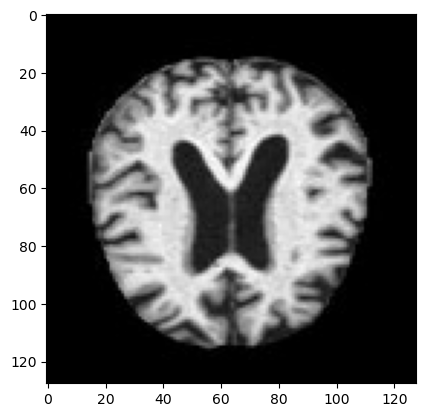

In [265]:
plt.imshow(mild[0])

Mean of normalized data: 3.092557625327701e-17
Standard deviation of normalized data: 0.8120115719426367


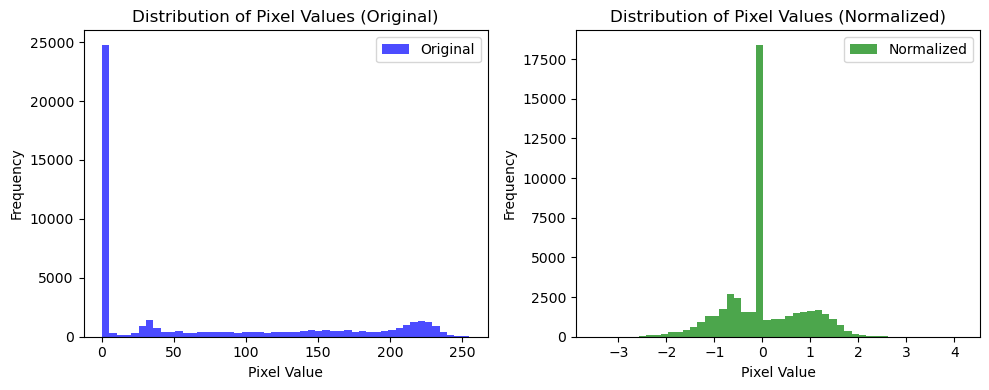

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


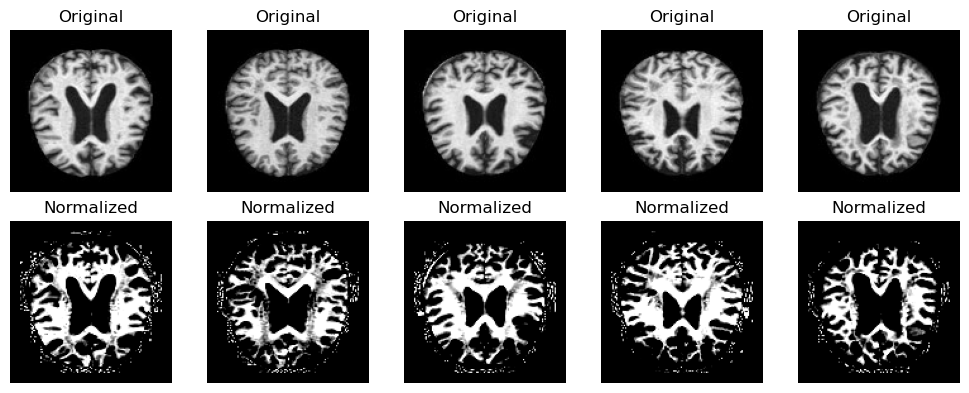

In [266]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Use your image data by assigning it to the 'mild' variable
# mild = ...

# Reshape the image data to a 2D array where each row represents a flattened image
n_samples = mild.shape[0]
flattened_images = mild.reshape(n_samples, -1)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on the flattened image data and transform
normalized_flattened_images = scaler.fit_transform(flattened_images)

# Calculate mean and standard deviation of normalized data
mean_normalized = np.mean(normalized_flattened_images)
std_normalized = np.std(normalized_flattened_images)

print("Mean of normalized data:", mean_normalized)
print("Standard deviation of normalized data:", std_normalized)

# Visualize the distribution of flattened pixel values before and after normalization
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(flattened_images[0], bins=50, color='blue', alpha=0.7, label='Original')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Distribution of Pixel Values (Original)')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(normalized_flattened_images[0], bins=50, color='green', alpha=0.7, label='Normalized')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Distribution of Pixel Values (Normalized)')
plt.legend()

plt.tight_layout()
plt.show()

# Visualize a few original and normalized images side by side
num_images_to_visualize = 5

plt.figure(figsize=(10, 4))
for i in range(num_images_to_visualize):
    plt.subplot(2, num_images_to_visualize, i + 1)
    plt.imshow(mild[i])
    plt.axis('off')
    plt.title("Original")

    plt.subplot(2, num_images_to_visualize, num_images_to_visualize + i + 1)
    plt.imshow(normalized_images[i])  # No need for vmin and vmax
    plt.axis('off')
    plt.title("Normalized")
    
plt.tight_layout()
plt.show()

After normalising, some things to take note of what has changed visually:

**Brightness and Contrast:** Normalization could affect the overall brightness and contrast of the images. If the original images had a wide range of pixel values, normalization might bring pixel values closer together, potentially reducing the contrast and making the images appear slightly darker.

**Color Balance:** If the images are in color (RGB format), normalization could potentially impact the color balance by affecting the values of the red, green, and blue channels. However, this effect is usually subtle and might not be easily noticeable.

**Noise:** In some cases, normalization might reduce the impact of noise, making the images appear smoother. This is because normalization can reduce the range of pixel values, potentially mitigating the influence of outliers.

**Visual Impact:** While the above changes might occur, the overall visual impact of normalization is often minimal. The most significant benefits are usually observed during training and optimization processes when the model relies on consistent and standardized input data.

In [267]:
normalized_images.shape

(896, 128, 128, 3)

In [268]:
flattened_images.shape

(896, 49152)

Applying the data preparation to the rest of the images

In [295]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Assuming you have healthy, very_mild, mild, and moderate arrays

# Concatenate the arrays
all_images = np.concatenate((healthy, very_mild, mild, moderate))

# Reshape the combined array to have the shape (total_samples, num_features)
n_samples = all_images.shape[0]
num_features = np.prod(all_images.shape[1:])
flattened_images = all_images.reshape(n_samples, num_features)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on the flattened image data and transform
normalized_flattened_images = scaler.fit_transform(flattened_images)

# Now normalized_flattened_images is a single array containing all normalized and flattened images

In [296]:
all_images.shape

(6400, 128, 128, 3)

In [299]:
normalized_flattened_images.shape

(6400, 49152)

In [309]:
from sklearn.model_selection import train_test_split

#splitting the DF with the split function
train_set, test_set, train_labels, test_labels= train_test_split(normalized_flattened_images, labels, stratify= labels, test_size= 0.3, random_state= 42)

In [312]:
train_set.shape

(4480, 49152)

In [313]:
test_set.shape

(1920, 49152)

In [314]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer() #sets the function to a variable, less writing.

#converting our labels which contain 0,1,2 into one-hot vector format which is required for the binarizor function
train_labels = lb.fit_transform(train_labels)
test_labels = lb.transform(test_labels) 

print('train_labels shape: ', train_labels.shape, 'and test_labels shape: ', test_labels.shape)

train_labels shape:  (4480, 4) and test_labels shape:  (1920, 4)


In [315]:
# Create a Sequential model
model = Sequential()

# Add layers to the model
model.add(Dense(256, input_shape=(49152,), activation="sigmoid"))
model.add(Dense(128, activation="sigmoid"))
model.add(Dense(4, activation="softmax"))

# Define optimizer
learnRate = 0.01
opt = SGD(learning_rate=learnRate, momentum=0.9)

# Compile the model
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# Number of runs the model does
epochs = 100

# Applying the data to the model
H = model.fit(train_set, train_labels, validation_data=(test_set, test_labels),
          epochs=epochs, batch_size=64, verbose=1)

# Applying the model to all the test data to check how well it's performed
predictionsANN = model.predict(test_set)

Epoch 1/100
70/70 [==============================] - 5s 69ms/step - loss: 0.8225 - accuracy: 0.6415 - val_loss: 0.6643 - val_accuracy: 0.7125
Epoch 2/100
70/70 [==============================] - 4s 63ms/step - loss: 0.5222 - accuracy: 0.8049 - val_loss: 0.4726 - val_accuracy: 0.8089
Epoch 3/100
70/70 [==============================] - 4s 64ms/step - loss: 0.3234 - accuracy: 0.8908 - val_loss: 0.4033 - val_accuracy: 0.8375
Epoch 4/100
70/70 [==============================] - 4s 64ms/step - loss: 0.1971 - accuracy: 0.9415 - val_loss: 0.2951 - val_accuracy: 0.8833
Epoch 5/100
70/70 [==============================] - 4s 63ms/step - loss: 0.1225 - accuracy: 0.9672 - val_loss: 0.2620 - val_accuracy: 0.8953
Epoch 6/100
70/70 [==============================] - 5s 66ms/step - loss: 0.0775 - accuracy: 0.9837 - val_loss: 0.2285 - val_accuracy: 0.9109
Epoch 7/100
70/70 [==============================] - 5s 67ms/step - loss: 0.0531 - accuracy: 0.9893 - val_loss: 0.2195 - val_accuracy: 0.9177
Epoch 

70/70 [==============================] - 4s 63ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.2659 - val_accuracy: 0.9208
Epoch 59/100
70/70 [==============================] - 4s 62ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.2666 - val_accuracy: 0.9208
Epoch 60/100
70/70 [==============================] - 4s 63ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.2673 - val_accuracy: 0.9214
Epoch 61/100
70/70 [==============================] - 4s 62ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.2673 - val_accuracy: 0.9214
Epoch 62/100
70/70 [==============================] - 4s 63ms/step - loss: 9.8989e-04 - accuracy: 1.0000 - val_loss: 0.2680 - val_accuracy: 0.9208
Epoch 63/100
70/70 [==============================] - 4s 62ms/step - loss: 9.7037e-04 - accuracy: 1.0000 - val_loss: 0.2688 - val_accuracy: 0.9208
Epoch 64/100
70/70 [==============================] - 4s 62ms/step - loss: 9.4866e-04 - accuracy: 1.0000 - val_loss: 0.2691 - val_accuracy: 0.9208


In [319]:
# Convert EagerTensor to a NumPy array
test_labels

# Print a formatted report
print(classification_report(
    test_labels.argmax(axis=1), 
    predictionsANN.argmax(axis=1), 
    target_names=[str(x) for x in lb.classes_]
))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       269
           1       0.92      0.90      0.91       672
           2       0.31      0.21      0.25        19
           3       0.95      0.97      0.96       960

    accuracy                           0.92      1920
   macro avg       0.76      0.73      0.74      1920
weighted avg       0.92      0.92      0.92      1920



In [333]:
demented_type_dict

{0: 'mild', 2: 'moderate_mild', 3: 'healthy', 1: 'very_mild'}

In [340]:
# Convert EagerTensor to a NumPy array
test_labels

# Print a formatted report
print(classification_report(
    test_labels.argmax(axis=1), 
    predictionsANN.argmax(axis=1), 
    target_names=[str(x) for x in lb.classes_]
))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       269
           1       0.92      0.90      0.91       672
           2       0.31      0.21      0.25        19
           3       0.95      0.97      0.96       960

    accuracy                           0.92      1920
   macro avg       0.76      0.73      0.74      1920
weighted avg       0.92      0.92      0.92      1920



In [342]:
from sklearn.metrics import classification_report


# Create a list of class names in the order of the indices
target_names = [demented_type_dict[i] for i in range(len(demented_type_dict))]

# Print a formatted report
print(classification_report(
    test_labels_np.argmax(axis=1), 
    predictionsANN.argmax(axis=1), 
    target_names=target_names
))


               precision    recall  f1-score   support

         mild       0.86      0.86      0.86       269
    very_mild       0.92      0.90      0.91       672
moderate_mild       0.31      0.21      0.25        19
      healthy       0.95      0.97      0.96       960

     accuracy                           0.92      1920
    macro avg       0.76      0.73      0.74      1920
 weighted avg       0.92      0.92      0.92      1920



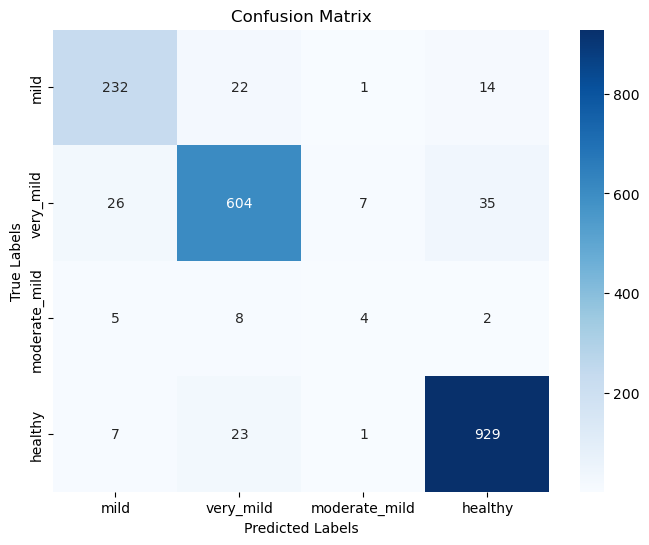

In [346]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Extract predicted labels from the model's predictions
predictions = np.argmax(predictionsANN, axis=1)

# Extract true labels from the test_labels
true_labels = np.argmax(test_labels, axis=1)

class_names = [demented_type_dict[0], demented_type_dict[1],
               demented_type_dict[2], demented_type_dict[3]]  # Replace with your class names

# Create the confusion matrix
conf_matrix = confusion_matrix(true_labels, predictions)

# Create a heatmap-style confusion matrix visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


moderate has low precision due to low number of available images. We can check if adding weights to this class will improve the results. 

very_mild and mild have some flase predictions understandably due to the similarities. We see the same behaviour between healthy and very_mild, even less with mild. 

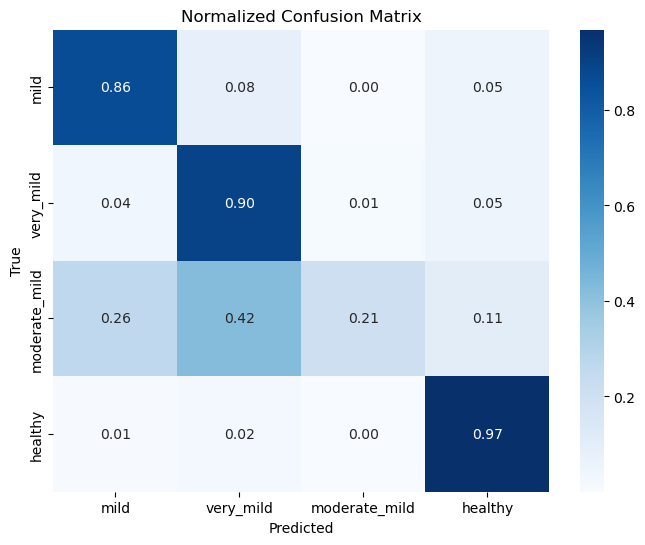

In [348]:

# Compute the confusion matrix
confusion = confusion_matrix(
    test_labels.argmax(axis=1),
    predictionsANN.argmax(axis=1),
    normalize='true'  # Set normalize to 'true' for proportions
)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, cmap='Blues', fmt='.2f',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Normalized Confusion Matrix')
plt.show()


Adding weights to the moderate class due to low number of images

In [380]:
from sklearn.utils.class_weight import compute_class_weight

# Flatten the train_labels array
train_labels_flat = train_labels.flatten()

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(train_labels_flat), y=train_labels_flat)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

In [382]:
classes

array([0, 1])

In [381]:
class_weights_dict

{0: 0.6666666666666666, 1: 2.0}

Flattening the `train_labels` causes information loss about each individual class. Better to use the labels before one-hot encoding and before splitting the dataset. 

In [384]:
from sklearn.utils.class_weight import compute_class_weight

# Assuming 'images' contains the image data and 'labels' contains the original labels

# Convert original labels to one-hot encoded format
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(labels_encoded), y=labels_encoded)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

In [379]:
class_weights_dict

{0: 1.7857142857142858, 1: 0.7142857142857143, 2: 25.0, 3: 0.5}

In [385]:
train_set, test_set, train_labels, test_labels= train_test_split(normalized_flattened_images, labels, 
                                                                 stratify= labels, test_size= 0.3, random_state= 42)

In [388]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer() #sets the function to a variable, less writing.

#converting our labels which contain 0,1,2 into one-hot vector format which is required for the binarizor function
train_labels = lb.fit_transform(train_labels)
test_labels = lb.transform(test_labels) 

print('train_labels shape: ', train_labels.shape, 'and test_labels shape: ', test_labels.shape)

train_labels shape:  (4480, 4) and test_labels shape:  (1920, 4)


In [389]:
# Create a Sequential model
model = Sequential()

# Add layers to the model
model.add(Dense(256, input_shape=(49152,), activation="sigmoid"))
model.add(Dense(128, activation="sigmoid"))
model.add(Dense(4, activation="softmax"))

# Define optimizer
learnRate = 0.01
opt = SGD(learning_rate=learnRate, momentum=0.9)

# Compile the model
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# Number of runs the model does
epochs = 100


# Applying the data to the model with class weights
H = model.fit(train_set, train_labels, validation_data=(test_set, test_labels),
              epochs=epochs, batch_size=64, verbose=1, class_weight=class_weights_dict)

# Applying the model to all the test data to check how well it's performed
predictionsANN = model.predict(test_set)

Epoch 1/100
70/70 [==============================] - 5s 69ms/step - loss: 1.0834 - accuracy: 0.4864 - val_loss: 0.8830 - val_accuracy: 0.5536
Epoch 2/100
70/70 [==============================] - 4s 64ms/step - loss: 0.6941 - accuracy: 0.6424 - val_loss: 0.7773 - val_accuracy: 0.6448
Epoch 3/100
70/70 [==============================] - 4s 64ms/step - loss: 0.4683 - accuracy: 0.7656 - val_loss: 0.5720 - val_accuracy: 0.7490
Epoch 4/100
70/70 [==============================] - 4s 63ms/step - loss: 0.2746 - accuracy: 0.8687 - val_loss: 0.4564 - val_accuracy: 0.8010
Epoch 5/100
70/70 [==============================] - 4s 64ms/step - loss: 0.1744 - accuracy: 0.9308 - val_loss: 0.3972 - val_accuracy: 0.8359
Epoch 6/100
70/70 [==============================] - 4s 64ms/step - loss: 0.1076 - accuracy: 0.9607 - val_loss: 0.3248 - val_accuracy: 0.8687
Epoch 7/100
70/70 [==============================] - 4s 63ms/step - loss: 0.0697 - accuracy: 0.9810 - val_loss: 0.2932 - val_accuracy: 0.8781
Epoch 

70/70 [==============================] - 4s 64ms/step - loss: 9.9908e-04 - accuracy: 1.0000 - val_loss: 0.2779 - val_accuracy: 0.9125
Epoch 59/100
70/70 [==============================] - 4s 64ms/step - loss: 9.7453e-04 - accuracy: 1.0000 - val_loss: 0.2787 - val_accuracy: 0.9125
Epoch 60/100
70/70 [==============================] - 4s 64ms/step - loss: 9.5325e-04 - accuracy: 1.0000 - val_loss: 0.2788 - val_accuracy: 0.9130
Epoch 61/100
70/70 [==============================] - 4s 64ms/step - loss: 9.3363e-04 - accuracy: 1.0000 - val_loss: 0.2793 - val_accuracy: 0.9130
Epoch 62/100
70/70 [==============================] - 4s 64ms/step - loss: 9.1385e-04 - accuracy: 1.0000 - val_loss: 0.2795 - val_accuracy: 0.9125
Epoch 63/100
70/70 [==============================] - 4s 64ms/step - loss: 8.9443e-04 - accuracy: 1.0000 - val_loss: 0.2798 - val_accuracy: 0.9130
Epoch 64/100
70/70 [==============================] - 4s 64ms/step - loss: 8.7610e-04 - accuracy: 1.0000 - val_loss: 0.2802 - val_a

In [390]:
# Print a formatted report
print(classification_report(
    test_labels_np.argmax(axis=1), 
    predictionsANN.argmax(axis=1), 
    target_names=target_names
))


               precision    recall  f1-score   support

         mild       0.83      0.87      0.85       269
    very_mild       0.92      0.89      0.91       672
moderate_mild       0.15      0.16      0.15        19
      healthy       0.95      0.96      0.95       960

     accuracy                           0.91      1920
    macro avg       0.71      0.72      0.72      1920
 weighted avg       0.92      0.91      0.91      1920



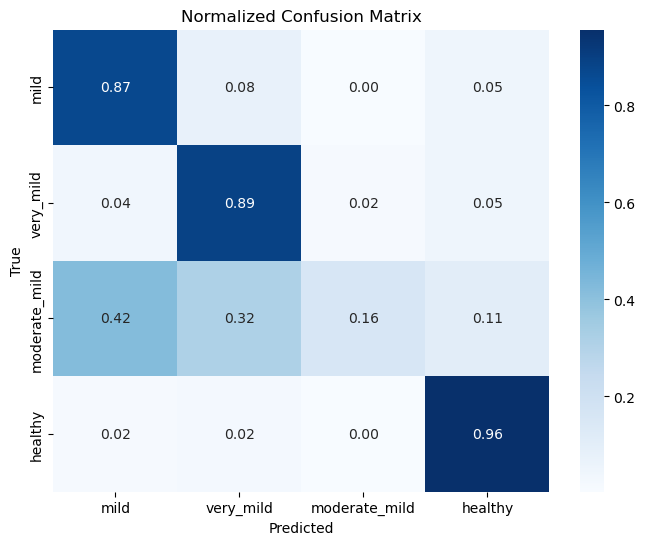

In [391]:
# Compute the confusion matrix
confusion = confusion_matrix(
    test_labels.argmax(axis=1),
    predictionsANN.argmax(axis=1),
    normalize='true'  # Set normalize to 'true' for proportions
)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, cmap='Blues', fmt='.2f',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Normalized Confusion Matrix')
plt.show()


Similar performance, performed better in other places compared to the model without class weights. With the number of images in the `moderate` class, it may be more wise to perform data augmentation followed by weights to see how the model improves.

# Data Augmentation

Augmenting the moderate class a number of times based off the performance of the model. I believe the images can only have a certain amount of augmentation before being inaccurate. With each number of augmentations we will gauge the performance of the model to see how it has been affected. It is recommended to exercise caution when applying aggressive data augmentation techniques. The augmentations should be done in consultation with medical professionals to ensure the changes made are consisten with clinical context.

Afterwards, we will check if adding weights will help.

## 10 augmentations

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator instance with conservative augmentations
datagen = ImageDataGenerator(
    width_shift_range=0.1,         # Small horizontal shifts
    height_shift_range=0.1,        # Small vertical shifts
    brightness_range=(0.9, 1.1),   # Slight brightness adjustments
    rotation_range=10,             # Small rotations within Â±10 degrees
    rescale=1.0/255                # Normalize pixel values
)

# Assuming you have a dataset directory with subdirectories for each class
train_generator = datagen.flow_from_directory(
    'path_to_train_data_directory',
    target_size=(128, 128),       # Image size
    batch_size=32,
    class_mode='categorical',     # Assuming one-hot encoded labels
    shuffle=True                  # Shuffle the data
)

# Create and compile your model

# Train the model using the augmented data generator
# model.fit(train_generator, epochs=100, ...)
